In [29]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/deeplearning/imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
pureSentences = sentences
y = df['label'].values

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


tokenizing data

In [0]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

getting the vocabulary of data


In [0]:
sentences = tokenizer.texts_to_matrix(sentences)

In [34]:
import numpy as np
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [0]:
model = Sequential()
model.add(layers.Dense(300,input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [10]:
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 7s 93us/step - loss: 0.8792 - acc: 0.5054 - val_loss: 0.8420 - val_acc: 0.5112
Epoch 2/5
75000/75000 [==============================] - 7s 90us/step - loss: 0.7896 - acc: 0.5766 - val_loss: 0.8423 - val_acc: 0.5162
Epoch 3/5
75000/75000 [==============================] - 7s 92us/step - loss: 0.6886 - acc: 0.6761 - val_loss: 0.8717 - val_acc: 0.5158
Epoch 4/5
75000/75000 [==============================] - 7s 91us/step - loss: 0.5074 - acc: 0.8071 - val_loss: 0.9370 - val_acc: 0.5031
Epoch 5/5
75000/75000 [==============================] - 7s 91us/step - loss: 0.3005 - acc: 0.9190 - val_loss: 1.0564 - val_acc: 0.5018


In [13]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in pureSentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureSentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)


176408
2470


In [15]:
from keras.layers import Embedding, Flatten
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history1=m.fit(X_train,y_train, epochs=3, verbose=True, validation_data=(X_test,y_test), batch_size=256)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 75000 samples, validate on 25000 samples
Epoch 1/3
75000/75000 [==============================] - 478s 6ms/step - loss: 1.0514 - acc: 0.4914 - val_loss: 0.8663 - val_acc: 0.5011
Epoch 2/3
75000/75000 [==============================] - 483s 6ms/step - loss: 0.8415 - acc: 0.5183 - val_loss: 0.8432 - val_acc: 0.5067
Epoch 3/3
75000/75000 [==============================] - 488s 7ms/step - loss: 0.7964 - acc: 0.5525 - val_loss: 0.8444 - val_acc: 0.5040


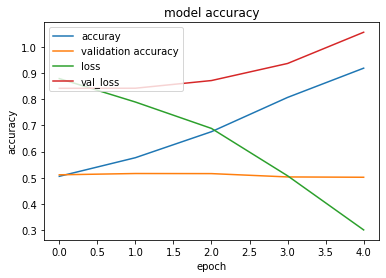

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [0]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)


In [0]:
sentences= twenty_train.data
y=twenty_train.target

In [0]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)


In [27]:
from keras.layers import Embedding, Flatten
n = Sequential()
n.add(Embedding(vocab_size, 50, input_length=max_review_len))
n.add(Flatten())
n.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
n.add(layers.Dense(20, activation='softmax'))
n.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
h2=n.fit(X_train,y_train, epochs=3, verbose=True, validation_data=(X_test,y_test), batch_size=256)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8485 samples, validate on 2829 samples
Epoch 1/3
8485/8485 [==============================] - 142s 17ms/step - loss: 8.3215 - acc: 0.0547 - val_loss: 3.0258 - val_acc: 0.0559
Epoch 2/3
8485/8485 [==============================] - 135s 16ms/step - loss: 3.0023 - acc: 0.0563 - val_loss: 2.9925 - val_acc: 0.0548
Epoch 3/3
8485/8485 [==============================] - 135s 16ms/step - loss: 2.9849 - acc: 0.0555 - val_loss: 2.9964 - val_acc: 0.0548


In [36]:
x=model.predict_classes(X_test[[1],:])
print("Actual Prediction",y_test[1],"Predicted Prediction",x)

Actual Prediction 2 Predicted Prediction [1]


In [37]:
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/Colab Notebooks/logs/{}".format(time()))
model.fit(X_train,y_train,verbose=1,callbacks=[tensorboard], epochs=5)

Epoch 1/5
75000/75000 [==============================] - 15s 206us/step - loss: 0.8647 - acc: 0.5021
Epoch 2/5
75000/75000 [==============================] - 15s 197us/step - loss: 0.7960 - acc: 0.5638
Epoch 3/5
75000/75000 [==============================] - 15s 197us/step - loss: 0.6578 - acc: 0.6843
Epoch 4/5
75000/75000 [==============================] - 15s 202us/step - loss: 0.3836 - acc: 0.8530
Epoch 5/5
75000/75000 [==============================] - 16s 212us/step - loss: 0.1664 - acc: 0.9542
